<a href="https://colab.research.google.com/github/MOUADASSILA/nba-network-analysis/blob/main/sosiyalNBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of edges: 43
Number of nodes: 31
Number of connected components: 1
Çap : 6
Yoğunluk : 0.09247311827956989


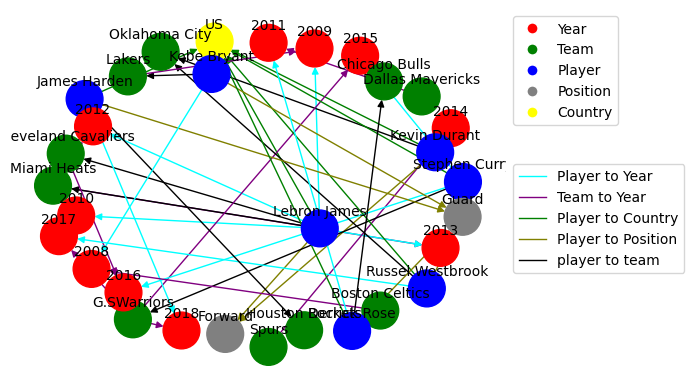

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
import community
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community.quality import modularity
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import greedy_modularity_communities


G = nx.DiGraph()

edges = [("Miami Heats", "2013"), ("Lebron James", "Forward"), ("Lebron James", "Miami Heats"), ("Lebron James", "US"), ("Lebron James", "2013"),
         ("Spurs", "2014"), ("Kevin Durant", "Forward"), ("Kevin Durant", "Oklahoma City"), ("Kevin Durant", "US"), ("Kevin Durant", "2014"),
         ("G.SWarriors", "2015"), ("Stephen Curry", "Guard"), ("Stephen Curry", "G.SWarriors"), ("Stephen Curry", "US"), ("Stephen Curry", "2015"),
         ("Cleveland Cavaliers", "2016"), ("Stephen Curry", "2016"),
         ("G.SWarriors", "2017"), ("Russel Westbrook", "Guard"), ("Russel Westbrook", "Oklahoma City"), ("Russel Westbrook", "US"),
         ("Russel Westbrook", "2017"),
         ("G.SWarriors", "2018"), ("James Harden", "Guard"), ("James Harden", "Houston Rockets"), ("James Harden", "US"), ("James Harden", "2018"),
         ("Boston Celtics", "2008"),("Kobe Bryant", "Guard"),("Kobe Bryant", "Lakers"),("Kobe Bryant", "US"),("Kobe Bryant", "2008"),
         ("Lakers", "2009"),("Lebron James", "Cleveland Cavaliers"),("Lebron James", "2009"),
         ("Lebron James", "2010"),
         ("Dallas Mavericks", "2011"),("Derrick Rose", "Guard"),("Derrick Rose", "Chicago Bulls"),("Derrick Rose", "US"),("Derrick Rose", "2011"),
         ("Miami Heats", "2012"),("Lebron James", "2012"),]
G.add_edges_from(edges)


node_types = {"2013": "tarih", "2014": "tarih", "2015": "tarih", "2016": "tarih",  "2017": "tarih", "2018": "tarih","2008": "tarih","2009": "tarih",
              "2010": "tarih","2011": "tarih","2012": "tarih",
              "Miami Heats": "takim", "Spurs": "takim", "G.SWarriors": "takim", "Cleveland Cavaliers": "takim", "Oklahoma City": "takim", "Boston Celtics": "takim",
              "Houston Rockets": "takim","Lakers": "takim","Dallas Mavericks": "takim","Chicago Bulls": "takim",
              "Lebron James": "oyuncu", "Kevin Durant": "oyuncu", "Stephen Curry": "oyuncu", "Russel Westbrook": "oyuncu", "James Harden": "oyuncu",
              "Kobe Bryant": "oyuncu","Derrick Rose": "oyuncu",
              "Forward": "poz", "Guard": "poz",
              "US": "ulke"}

type_colors = {"tarih": "red", "takim": "green", "oyuncu": "blue", "poz": "gray", "ulke": "yellow"}


node_colors = [type_colors[node_types[node]] for node in G.nodes]

edge_colors = []
for edge in G.edges:
    source_type = node_types[edge[0]]
    target_type = node_types[edge[1]]

    if source_type == "oyuncu" and target_type == "tarih":
        edge_colors.append("aqua")
    elif source_type == "takim" and target_type == "tarih":
        edge_colors.append("purple")
    elif source_type == "oyuncu" and target_type == "ulke":
        edge_colors.append("green")
    elif source_type == "oyuncu" and target_type == "poz":
        edge_colors.append("#808000")
    else:
        edge_colors.append("black")



edge_widths = [1.0] * len(G.edges)

pos = nx.spring_layout(G, k=3, seed=62)


node_labels = {node: (pos[node][0], pos[node][1] + 0.11) for node in G.nodes}

legend_labels = {"tarih": "Year", "takim": "Team", "oyuncu": "Player", "poz": "Position", "ulke": "Country"}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=legend_labels[type]) for type, color in type_colors.items()]
node_legend = plt.legend(handles=legend_handles, loc="upper left", bbox_to_anchor=(1, 1))


edge_legend_labels = {
    "aqua": "Player to Year",
    "purple": "Team to Year",
    "green": "Player to Country",
    "#808000": "Player to Position",
    "black": "player to team"
}
edge_legend_handles = [plt.Line2D([0], [0], color=color, lw=1, label=label) for color, label in edge_legend_labels.items()]
edge_legend = plt.legend(handles=edge_legend_handles, loc="upper left", bbox_to_anchor=(1, 0.6))


plt.gca().add_artist(node_legend)




nx.draw(G, pos, with_labels=False, node_size=700, arrows=True, node_color=node_colors,
        width=edge_widths, edge_color=edge_colors)
nx.draw_networkx_labels(G, node_labels, font_size=10,  font_color='black', font_family='sans-serif')



# Number of edges
num_edges = G.number_of_edges()
print("Number of edges:", num_edges)

# Number of nodes
num_nodes = G.number_of_nodes()
print("Number of nodes:", num_nodes)

# Connected components
connected_components = list(nx.weakly_connected_components(G))
num_connected_components = len(connected_components)
print("Number of connected components:", num_connected_components)

# Çap (diameter) hesaplama
diameter = 0
try:
    diameter = nx.diameter(G.to_undirected())
except nx.NetworkXError:
    print("Çap hesaplanamıyor. Grafik bağlı değil.")

print("Çap :", diameter)


# Yoğunluk (density) hesaplama
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

max_possible_edges = (num_nodes * (num_nodes - 1)) // 2  # Complete graph için maksimum kenar sayısı
density = num_edges / max_possible_edges if max_possible_edges > 0 else 0.0

print("Yoğunluk :", density)


plt.show()






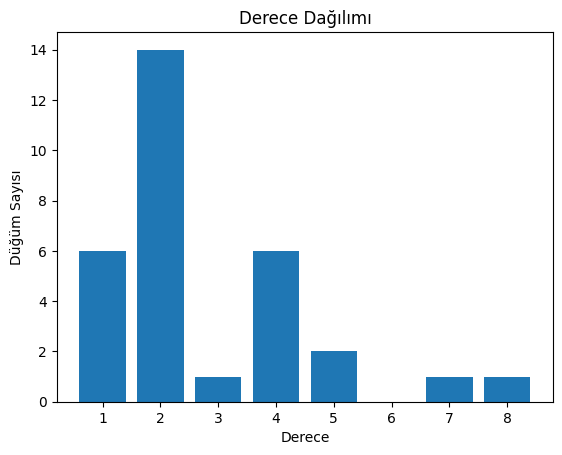

In [3]:
# Derece dağılımını hesaplama
degree_sequence = [d for n, d in G.degree()]

# Derece dağılımını görselleştirme
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 2), align='left', rwidth=0.8)
plt.title("Derece Dağılımı")
plt.xlabel("Derece")
plt.ylabel("Düğüm Sayısı")
plt.show()

In [4]:
# Kümeleme katsayısını hesaplama
clustering_coefficient = nx.average_clustering(G)

print("Kümeleme Katsayısı:", clustering_coefficient)

Kümeleme Katsayısı: 0.06459293394777266


In [5]:
# Kümeleme katsayılarını hesaplama
clustering_coefficients = nx.clustering(G)

# En yüksek 6 ve en düşük 6 kümeleme katsayısını bulma
sorted_coefficients = sorted(clustering_coefficients.items(), key=lambda x: x[1], reverse=True)
top_6_high = sorted_coefficients[:6]
top_6_low = sorted_coefficients[-6:]

# Sonuçları satır satır gösterme
print("En Yüksek 6 Kümeleme Katsayısı:")
for node, coefficient in top_6_high:
    print(f"{node}: {coefficient}")

print("\nEn Düşük 6 Kümeleme Katsayısı:")
for node, coefficient in top_6_low:
    print(f"{node}: {coefficient}")

En Yüksek 6 Kümeleme Katsayısı:
2013: 0.5
2015: 0.5
2012: 0.5
Miami Heats: 0.3333333333333333
G.SWarriors: 0.08333333333333333
Stephen Curry: 0.05

En Düşük 6 Kümeleme Katsayısı:
2009: 0
2010: 0
Dallas Mavericks: 0
2011: 0
Derrick Rose: 0
Chicago Bulls: 0


In [6]:

# Derece Merkeziliği hesaplama
degree_centrality = nx.degree_centrality(G)

# Yakınlık Merkeziliği hesaplama
closeness_centrality = nx.closeness_centrality(G)

# Arasındalık Merkeziliği hesaplama
betweenness_centrality = nx.betweenness_centrality(G)

# Sonuçları gösterme
print("Derece Merkeziliği:")
for node, degree in degree_centrality.items():
    print(f"{node}: {degree}")

print("\nYakınlık Merkeziliği:")
for node, closeness in closeness_centrality.items():
    print(f"{node}: {closeness}")

print("\nArasındalık Merkeziliği:")
for node, betweenness in betweenness_centrality.items():
    print(f"{node}: {betweenness}")

Derece Merkeziliği:
Miami Heats: 0.1
2013: 0.06666666666666667
Lebron James: 0.26666666666666666
Forward: 0.06666666666666667
US: 0.23333333333333334
Spurs: 0.03333333333333333
2014: 0.06666666666666667
Kevin Durant: 0.13333333333333333
Oklahoma City: 0.06666666666666667
G.SWarriors: 0.13333333333333333
2015: 0.06666666666666667
Stephen Curry: 0.16666666666666666
Guard: 0.16666666666666666
Cleveland Cavaliers: 0.06666666666666667
2016: 0.06666666666666667
2017: 0.06666666666666667
Russel Westbrook: 0.13333333333333333
2018: 0.06666666666666667
James Harden: 0.13333333333333333
Houston Rockets: 0.03333333333333333
Boston Celtics: 0.03333333333333333
2008: 0.06666666666666667
Kobe Bryant: 0.13333333333333333
Lakers: 0.06666666666666667
2009: 0.06666666666666667
2010: 0.03333333333333333
Dallas Mavericks: 0.03333333333333333
2011: 0.06666666666666667
Derrick Rose: 0.13333333333333333
Chicago Bulls: 0.03333333333333333
2012: 0.06666666666666667

Yakınlık Merkeziliği:
Miami Heats: 0.0333333

In [7]:
#en yüksek
# Derece Merkeziliği hesaplama
degree_centrality = nx.degree_centrality(G)
max_degree_node = max(degree_centrality, key=degree_centrality.get)
max_degree_value = degree_centrality[max_degree_node]
print("En yüksek Derece Merkeziliği:")
print(f"Düğüm: {max_degree_node}, Derece: {max_degree_value}")

# Yakınlık Merkeziliği hesaplama
closeness_centrality = nx.closeness_centrality(G)
max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
max_closeness_value = closeness_centrality[max_closeness_node]
print("\nEn yüksek Yakınlık Merkeziliği:")
print(f"Düğüm: {max_closeness_node}, Yakınlık: {max_closeness_value}")

# Arasındalık Merkeziliği hesaplama
betweenness_centrality = nx.betweenness_centrality(G)
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
max_betweenness_value = betweenness_centrality[max_betweenness_node]
print("\nEn yüksek Arasındalık Merkeziliği:")
print(f"Düğüm: {max_betweenness_node}, Arasındalık: {max_betweenness_value}")

En yüksek Derece Merkeziliği:
Düğüm: Lebron James, Derece: 0.26666666666666666

En yüksek Yakınlık Merkeziliği:
Düğüm: US, Yakınlık: 0.23333333333333334

En yüksek Arasındalık Merkeziliği:
Düğüm: G.SWarriors, Arasındalık: 0.0022988505747126436


In [15]:

# Jaccard Benzerliği hesaplama (yönlü grafik için)
def jaccard_similarity(u, v):
    union_size = len(set(G.successors(u)).union(set(G.successors(v))))
    intersection_size = len(set(G.successors(u)).intersection(set(G.successors(v))))
    return intersection_size / union_size if union_size > 0 else 0

# Kosinüs Benzerliği hesaplama
adj_matrix = nx.to_numpy_array(G)
cosine_similarity_matrix = cosine_similarity(adj_matrix)

# Komşu Benzerliği hesaplama
def neighbor_similarity(graph):
    adjacency_matrix = nx.adjacency_matrix(graph)
    similarity_matrix = 1 - pairwise_distances(adjacency_matrix, metric="cosine")
    return similarity_matrix

neighbor_similarity_matrix = neighbor_similarity(G)

# Sonuçları gösterme (0 olmayan örnekler)
print("Jaccard Benzerliği:")
for u in G.nodes():
    for v in G.nodes():
        if u != v:
            similarity = jaccard_similarity(u, v)
            if similarity != 0:
                print(f"Düğüm {u} ve Düğüm {v}: {similarity}")

print("\nKosinüs Benzerliği:")
for u in range(len(G.nodes)):
    for v in range(u + 1, len(G.nodes)):
        similarity = cosine_similarity_matrix[u, v]
        if similarity != 0:
            print(f"Düğüm {u} ve Düğüm {v}: {similarity}")
print("\nKomşu Benzerliği:")
for i in range(len(G.nodes)):
    for j in range(i + 1, len(G.nodes)):
        similarity = neighbor_similarity_matrix[i, j]
        if similarity != 0:

            print(f"Düğüm {u} ve Düğüm {v}: {similarity}")


Jaccard Benzerliği:
Düğüm Miami Heats ve Düğüm Lebron James: 0.25
Düğüm Lebron James ve Düğüm Miami Heats: 0.25
Düğüm Lebron James ve Düğüm Kevin Durant: 0.2
Düğüm Lebron James ve Düğüm Stephen Curry: 0.08333333333333333
Düğüm Lebron James ve Düğüm Russel Westbrook: 0.09090909090909091
Düğüm Lebron James ve Düğüm James Harden: 0.09090909090909091
Düğüm Lebron James ve Düğüm Kobe Bryant: 0.09090909090909091
Düğüm Lebron James ve Düğüm Lakers: 0.125
Düğüm Lebron James ve Düğüm Derrick Rose: 0.09090909090909091
Düğüm Spurs ve Düğüm Kevin Durant: 0.25
Düğüm Kevin Durant ve Düğüm Lebron James: 0.2
Düğüm Kevin Durant ve Düğüm Spurs: 0.25
Düğüm Kevin Durant ve Düğüm Stephen Curry: 0.125
Düğüm Kevin Durant ve Düğüm Russel Westbrook: 0.3333333333333333
Düğüm Kevin Durant ve Düğüm James Harden: 0.14285714285714285
Düğüm Kevin Durant ve Düğüm Kobe Bryant: 0.14285714285714285
Düğüm Kevin Durant ve Düğüm Derrick Rose: 0.14285714285714285
Düğüm G.SWarriors ve Düğüm Stephen Curry: 0.14285714285714285

In [9]:

#en yüksek
# Jaccard Benzerliği hesaplama
def jaccard_similarity(u, v):
    union_size = len(set(G.successors(u)).union(set(G.successors(v))))
    intersection_size = len(set(G.successors(u)).intersection(set(G.successors(v))))
    return intersection_size / union_size if union_size > 0 else 0

# Kosinüs Benzerliği hesaplama
adj_matrix = nx.to_numpy_array(G)
cosine_similarity_matrix = cosine_similarity(adj_matrix)

# Komşu Benzerliği hesaplama
def neighbor_similarity(graph):
    adjacency_matrix = nx.adjacency_matrix(graph)
    similarity_matrix = 1 - pairwise_distances(adjacency_matrix, metric="cosine")
    return similarity_matrix

neighbor_similarity_matrix = neighbor_similarity(G)

# Belirli bir eşik değerine göre en yüksek benzerlik değerlerini bulma
threshold = 0.1  # Yeni eşik değeri
print("Jaccard Benzerliği:")
count_jaccard = 0
for u in G.nodes():
    for v in G.nodes():
        if u != v:
            similarity = jaccard_similarity(u, v)
            if similarity > threshold and count_jaccard < 5:
                print(f"Düğüm {u} ve Düğüm {v}: {similarity}")
                count_jaccard += 1

print("\nKosinüs Benzerliği:")
count_cosine = 0
for i in range(len(G.nodes)):
    for j in range(i + 1, len(G.nodes)):
        similarity = cosine_similarity_matrix[i, j]
        if similarity > threshold and count_cosine < 5:
            print(f"Düğüm {u} ve Düğüm {v}: {similarity}")
            count_cosine += 1

print("\nKomşu Benzerliği:")
count_neighbor = 0
for i in range(len(G.nodes)):
    for j in range(i + 1, len(G.nodes)):
        similarity = neighbor_similarity_matrix[i, j]
        if similarity > threshold and count_neighbor < 5:
            print(f"Düğüm {u} ve Düğüm {v}: {similarity}")
            count_neighbor += 1


Jaccard Benzerliği:
Düğüm Miami Heats ve Düğüm Lebron James: 0.25
Düğüm Lebron James ve Düğüm Miami Heats: 0.25
Düğüm Lebron James ve Düğüm Kevin Durant: 0.2
Düğüm Lebron James ve Düğüm Lakers: 0.125
Düğüm Spurs ve Düğüm Kevin Durant: 0.25

Kosinüs Benzerliği:
Düğüm 2012 ve Düğüm 2012: 0.4999999999999999
Düğüm 2012 ve Düğüm 2012: 0.35355339059327373
Düğüm 2012 ve Düğüm 2012: 0.15811388300841894
Düğüm 2012 ve Düğüm 2012: 0.17677669529663687
Düğüm 2012 ve Düğüm 2012: 0.17677669529663687

Komşu Benzerliği:
Düğüm 2012 ve Düğüm 2012: 0.4999999999999999
Düğüm 2012 ve Düğüm 2012: 0.35355339059327373
Düğüm 2012 ve Düğüm 2012: 0.158113883008419
Düğüm 2012 ve Düğüm 2012: 0.17677669529663687
Düğüm 2012 ve Düğüm 2012: 0.17677669529663687


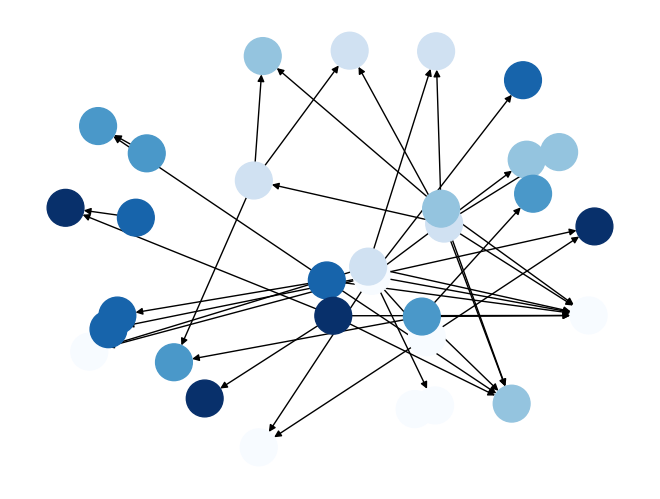

Modülerlik: 0.4986479177934019


In [10]:
#topluluk
# Louvain algoritması ile topluluk tespiti
communities = list(greedy_modularity_communities(G))

# Düğümleri topluluklara göre renklendirme
color_map = {}
for i, community in enumerate(communities):
    for node in community:
        color_map[node] = i

# Toplulukları görselleştirme
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=700, node_color=list(color_map.values()), cmap=plt.cm.Blues)
plt.show()

# Modülerlik hesaplama
modularity_value = modularity(G, communities)
print(f"Modülerlik: {modularity_value}")



In [11]:
# Topluluk sayısını
num_communities = len(communities)

print(f"Louvain ile bulunan topluluk sayısı: {num_communities}")

Louvain ile bulunan topluluk sayısı: 6


In [12]:

# Her bir topluluğun düğümlerini göster
for i, community in enumerate(communities):
    print(f"Topluluk {i + 1}: {community}")

Topluluk 1: frozenset({'2018', 'Houston Rockets', 'Guard', '2017', 'US', 'James Harden', 'Russel Westbrook'})
Topluluk 2: frozenset({'2010', 'Miami Heats', '2013', '2012', 'Lebron James'})
Topluluk 3: frozenset({'Oklahoma City', 'Forward', 'Spurs', '2014', 'Kevin Durant'})
Topluluk 4: frozenset({'2016', '2015', 'Cleveland Cavaliers', 'G.SWarriors', 'Stephen Curry'})
Topluluk 5: frozenset({'Boston Celtics', '2009', 'Kobe Bryant', 'Lakers', '2008'})
Topluluk 6: frozenset({'Chicago Bulls', 'Derrick Rose', 'Dallas Mavericks', '2011'})


In [13]:
pagerank_scores = nx.pagerank(G)

# Her bir düğümün PageRank skorunu yazdır
for node, score in pagerank_scores.items():
    print(f"{node}: {score}")

Miami Heats: 0.025486370581084557
2013: 0.0363178819051367
Lebron James: 0.023038591985587477
Forward: 0.030381927772078723
US: 0.0538806022888507
Spurs: 0.023038591985587477
2014: 0.04751637794055829
Kevin Durant: 0.023038591985587477
Oklahoma City: 0.0328297063675758
G.SWarriors: 0.026955037738382807
2015: 0.03459220406457643
Stephen Curry: 0.023038591985587477
Guard: 0.04653726650235946
Cleveland Cavaliers: 0.025486370581084557
2016: 0.04861806038648709
2017: 0.03557131550277526
Russel Westbrook: 0.023038591985587477
2018: 0.03557131550277526
James Harden: 0.023038591985587477
Houston Rockets: 0.027934149176581644
Boston Celtics: 0.023038591985587477
2008: 0.04751637794055829
Kobe Bryant: 0.023038591985587477
Lakers: 0.027934149176581644
2009: 0.04923018711331646
2010: 0.025486370581084557
Dallas Mavericks: 0.023038591985587477
2011: 0.04751637794055829
Derrick Rose: 0.023038591985587477
Chicago Bulls: 0.027934149176581644
2012: 0.0363178819051367
